In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [102]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/ecg vs r-r values/remaining.csv")

In [103]:
df.head(1000)

,ecg,Rrvalues
0,-1.3684,0.667
1,-1.3669,0.675
2,-1.3548,0.682
3,-1.3651,0.684
4,-1.3707,0.705
...,...,...
995,-1.3508,0.758
996,-1.3660,0.747
997,-1.3711,0.761
998,-1.3824,0.778


In [104]:
df.describe()

,ecg,Rrvalues
count,1111.000000,1111.000000
mean,-1.366983,0.719074
std,0.059187,0.065050
min,-2.887100,0.583000
25%,-1.374250,0.671000
50%,-1.366000,0.705000
75%,-1.355400,0.767000
max,-0.965700,1.409000


In [105]:
df.shape

(1111, 2)

In [106]:
cdf = df[['ecg','Rrvalues']]
cdf.head(5)

,ecg,Rrvalues
0,-1.3684,0.667
1,-1.3669,0.675
2,-1.3548,0.682
3,-1.3651,0.684
4,-1.3707,0.705


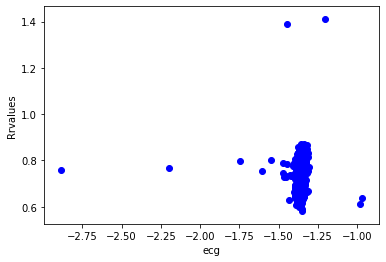

In [107]:
#graph of SNO vs r-r values

plt.scatter(cdf.ecg, cdf.Rrvalues,color='blue')
plt.xlabel('ecg')
plt.ylabel('Rrvalues')
plt.show()

In [108]:
#splitting our data in 80-20 ratio for regression

In [109]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

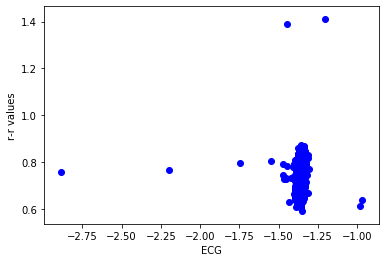

In [110]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.ecg, train.Rrvalues,  color='blue')
plt.xlabel("ECG")
plt.ylabel("r-r values")
plt.show()

In [111]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ecg']])
train_y = np.asanyarray(train[['Rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.00140954]]
Intercept:  [0.72208898]


Text(0, 0.5, 'r-r values')

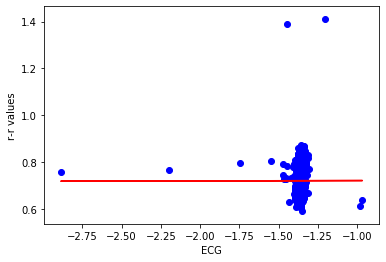

In [112]:
plt.scatter(train.ecg, train.Rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("ECG")
plt.ylabel("r-r values")

In [113]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ecg']])
test_y = np.asanyarray(test[['Rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: -3456774.84


In [114]:
#using polynomial regression

In [115]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ecg']])
train_y = np.asanyarray(train[['Rrvalues']])

test_x = np.asanyarray(test[['ecg']])
test_y = np.asanyarray(test[['Rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.        , -1.3684    ,  1.87251856],
       [ 1.        , -1.3669    ,  1.86841561],
       [ 1.        , -1.3548    ,  1.83548304],
       ...,
       [ 1.        , -1.3521    ,  1.82817441],
       [ 1.        , -1.3615    ,  1.85368225],
       [ 1.        , -1.3784    ,  1.89998656]])

In [116]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[0.         0.31670122 0.08305389]]
Intercept:  [0.99758299]


Text(0, 0.5, 'Rrvalues')

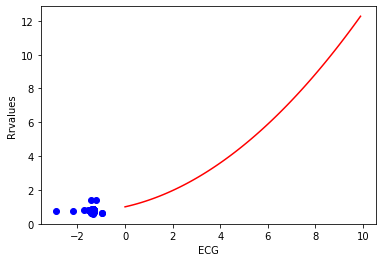

In [117]:
#plotting the polynomial regression
plt.scatter(train.ecg, train.Rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("ECG")
plt.ylabel("Rrvalues")

In [118]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: -1062.64
